# Problem Statement:

Predcit the age of Abalone from physical measurements, the age of abaolone is determined by cutting the shell through the cone,
staining it, and counting the number of rings through microsocope.
Target Variables  is the number of rings is the value to predict.

#### Importing Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

 Obs : 
- Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.
- Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.
- Importing Common Regression Metrics Mean Absolute error, Mean Squared error.
- Importing Label encoder libraries as well as standard scaler libraries.

# Loading Dataset

In [137]:
abalone = pd.read_csv('Abalone.csv')
# abalone is the dataset object 

# Creating Separate Dataframe

In [138]:
df = pd.DataFrame(abalone)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- The Target Variable -Rings is Numeric & Integer type and has one object data type Gender Column (sex) which is category type whose class is M-male & F-female.
- All other independent variable except Target & Gender Column are Continous type.

# Initial Analysis

In [139]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

-Gender Column sex is a Object Data Type, Rings is a int data type and rest all are float data type.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- Index 0 - sex column & index 8- Traget Column Rings
- There are 4177 rows 
- One Object type Column
- One Interger Column which is Target Column Ring
- Seven Float Variables.

In [141]:
df.shape

(4177, 9)

- The datset shape shows that it has 4177 rows & 9 Columns

# Misssing Value Detection

In [142]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

- There is no missing value in a dataset.

In [143]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- Whole Weight & Shucked weight Shows high std value comparatively
- Mean of Length, diameter, height  is less then 50th Percentile.
- Whole weight, Shucked weight & Viscera weight mean is slightly more than 50th Percentile.
- As per above observation skewness might be present in those variables.

In [144]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

The Sex Column is Catgegorical which shows three unique category
M - Male 
F - Female
I - Infant

# Countplot

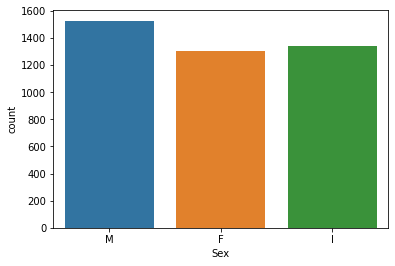

In [145]:
sns.countplot(df['Sex']);

- Countplot shows distribution of count for three category Male, Female & Infant.
- Male Count is slightly more then Female & Infant.
- Female count has lowest count value as compared to infant & Male Category.
- There is no big difference between infant & Female Count.

# Label Encoder

In [146]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- Male is Label Encoded with Number 2
- Female is label encoded with zero Number
- Infant is Label encoded as Number 1

In [147]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

- Male is Label Encoded with Number 2
- Female is label encoded with zero Number
- Infant is Label encoded as Number 1

In [148]:
df.columns # Check the spaces in varaibles name

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

- This commands display Correct Variables Names with no spaces at the end.

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

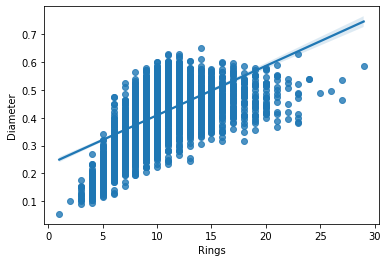

In [149]:
sns.regplot(x="Rings",y="Diameter",data=df)

- There is linear relationship seen between diameter & Target Variable rings and best fit linear relationship line is seen 

<AxesSubplot:xlabel='Rings', ylabel='Height'>

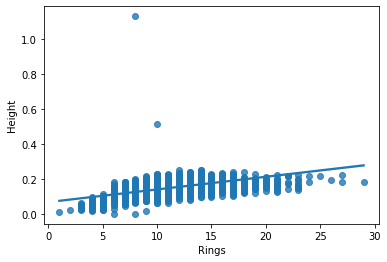

In [150]:
sns.regplot(x="Rings",y="Height",data=df)

- There is a linear relationship seen from low to higher value of target column 
- Best fit linear relationship line can be seen on the plot.

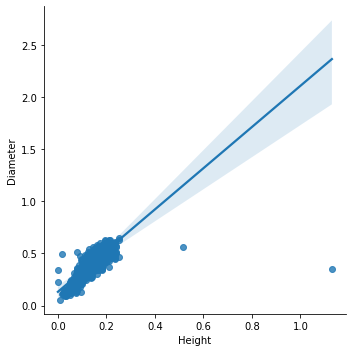

In [151]:
sns.lmplot(x="Height",y="Diameter",data=df)

- Lmplot shows most of the data is scatterd under 0.4 of height & and under 1.0 diameter column.
- Showing Linear relationship with best fit line can be seen on the plot.

# Skewness Detection with Histogram plot & distplot

In [152]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

- Lenght & Diameter are left skewed 
- Height column is highly positively skewed.
- Whole weight, Viscera weight & Shell weight are slightly right skewed. 

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

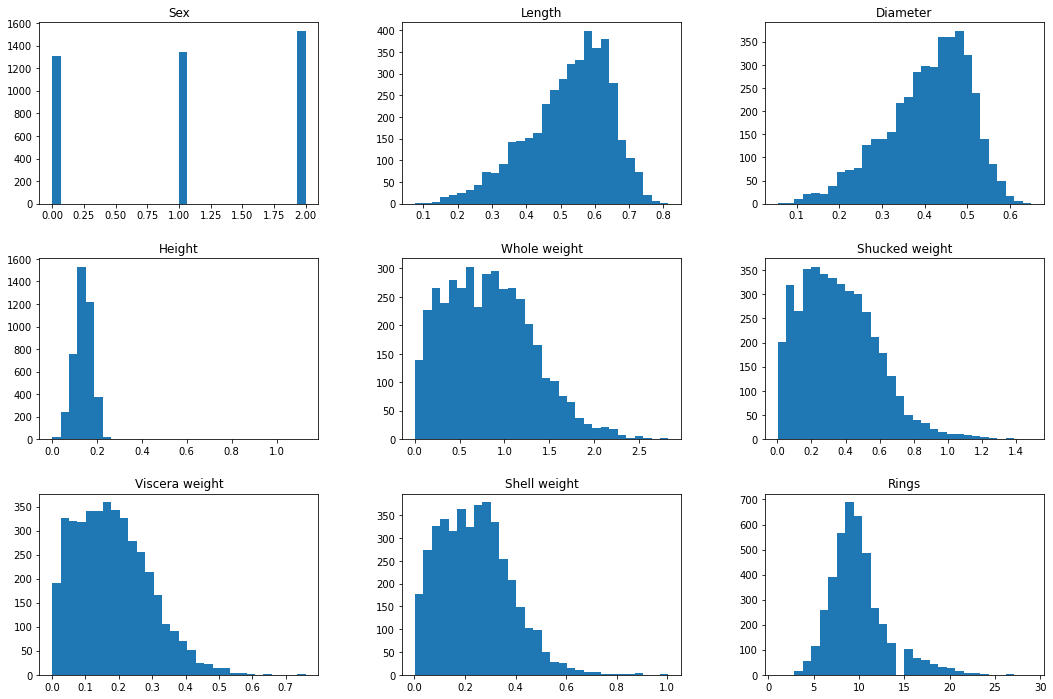

In [153]:
df.hist(grid=False, figsize=(18,12), bins=30)

- The plot shows length & diameter data is left skewed as most of the data fall on left side of the mean.
- Height Column Shows very high positive skewness.
- Whole weight, Viscera weight & Shell weight are slightly right skewed. 

# distplot

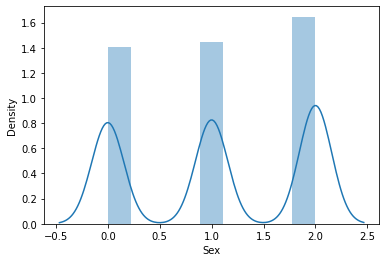

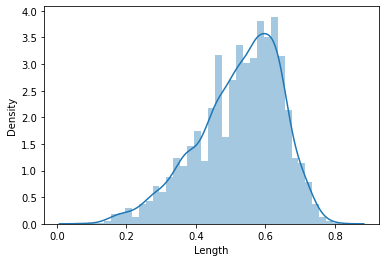

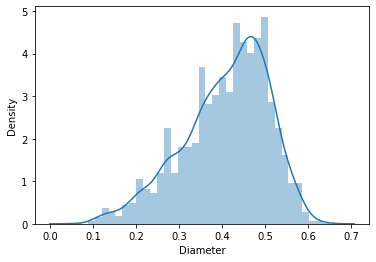

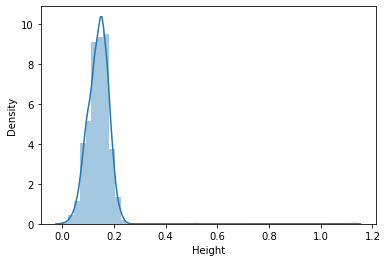

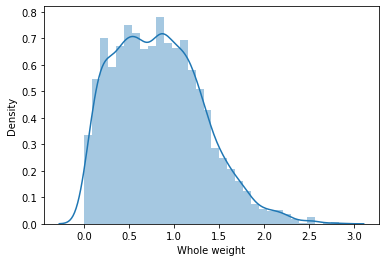

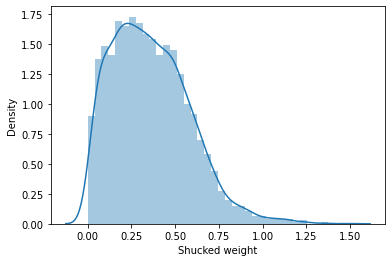

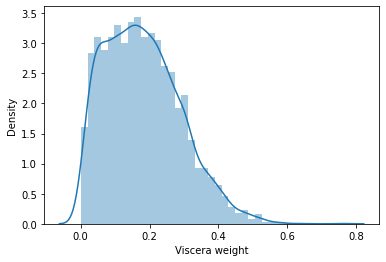

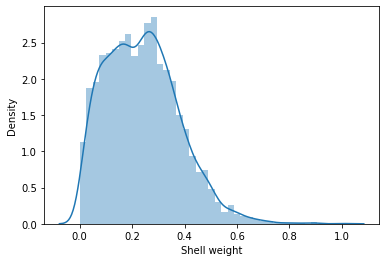

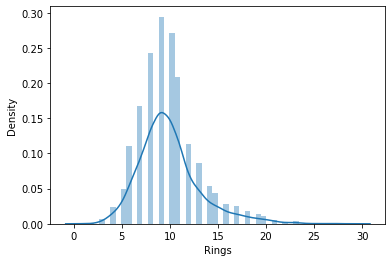

In [154]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- The plot shows length & diameter data is left skewed as most of the data fall on left side of the mean.
- Height Column Shows very high positive skewness.
- Whole weight, Viscera weight & Shell weight are slightly right skewed. 

# Outlier Detection

### Boxplot for outlier detection

<AxesSubplot:>

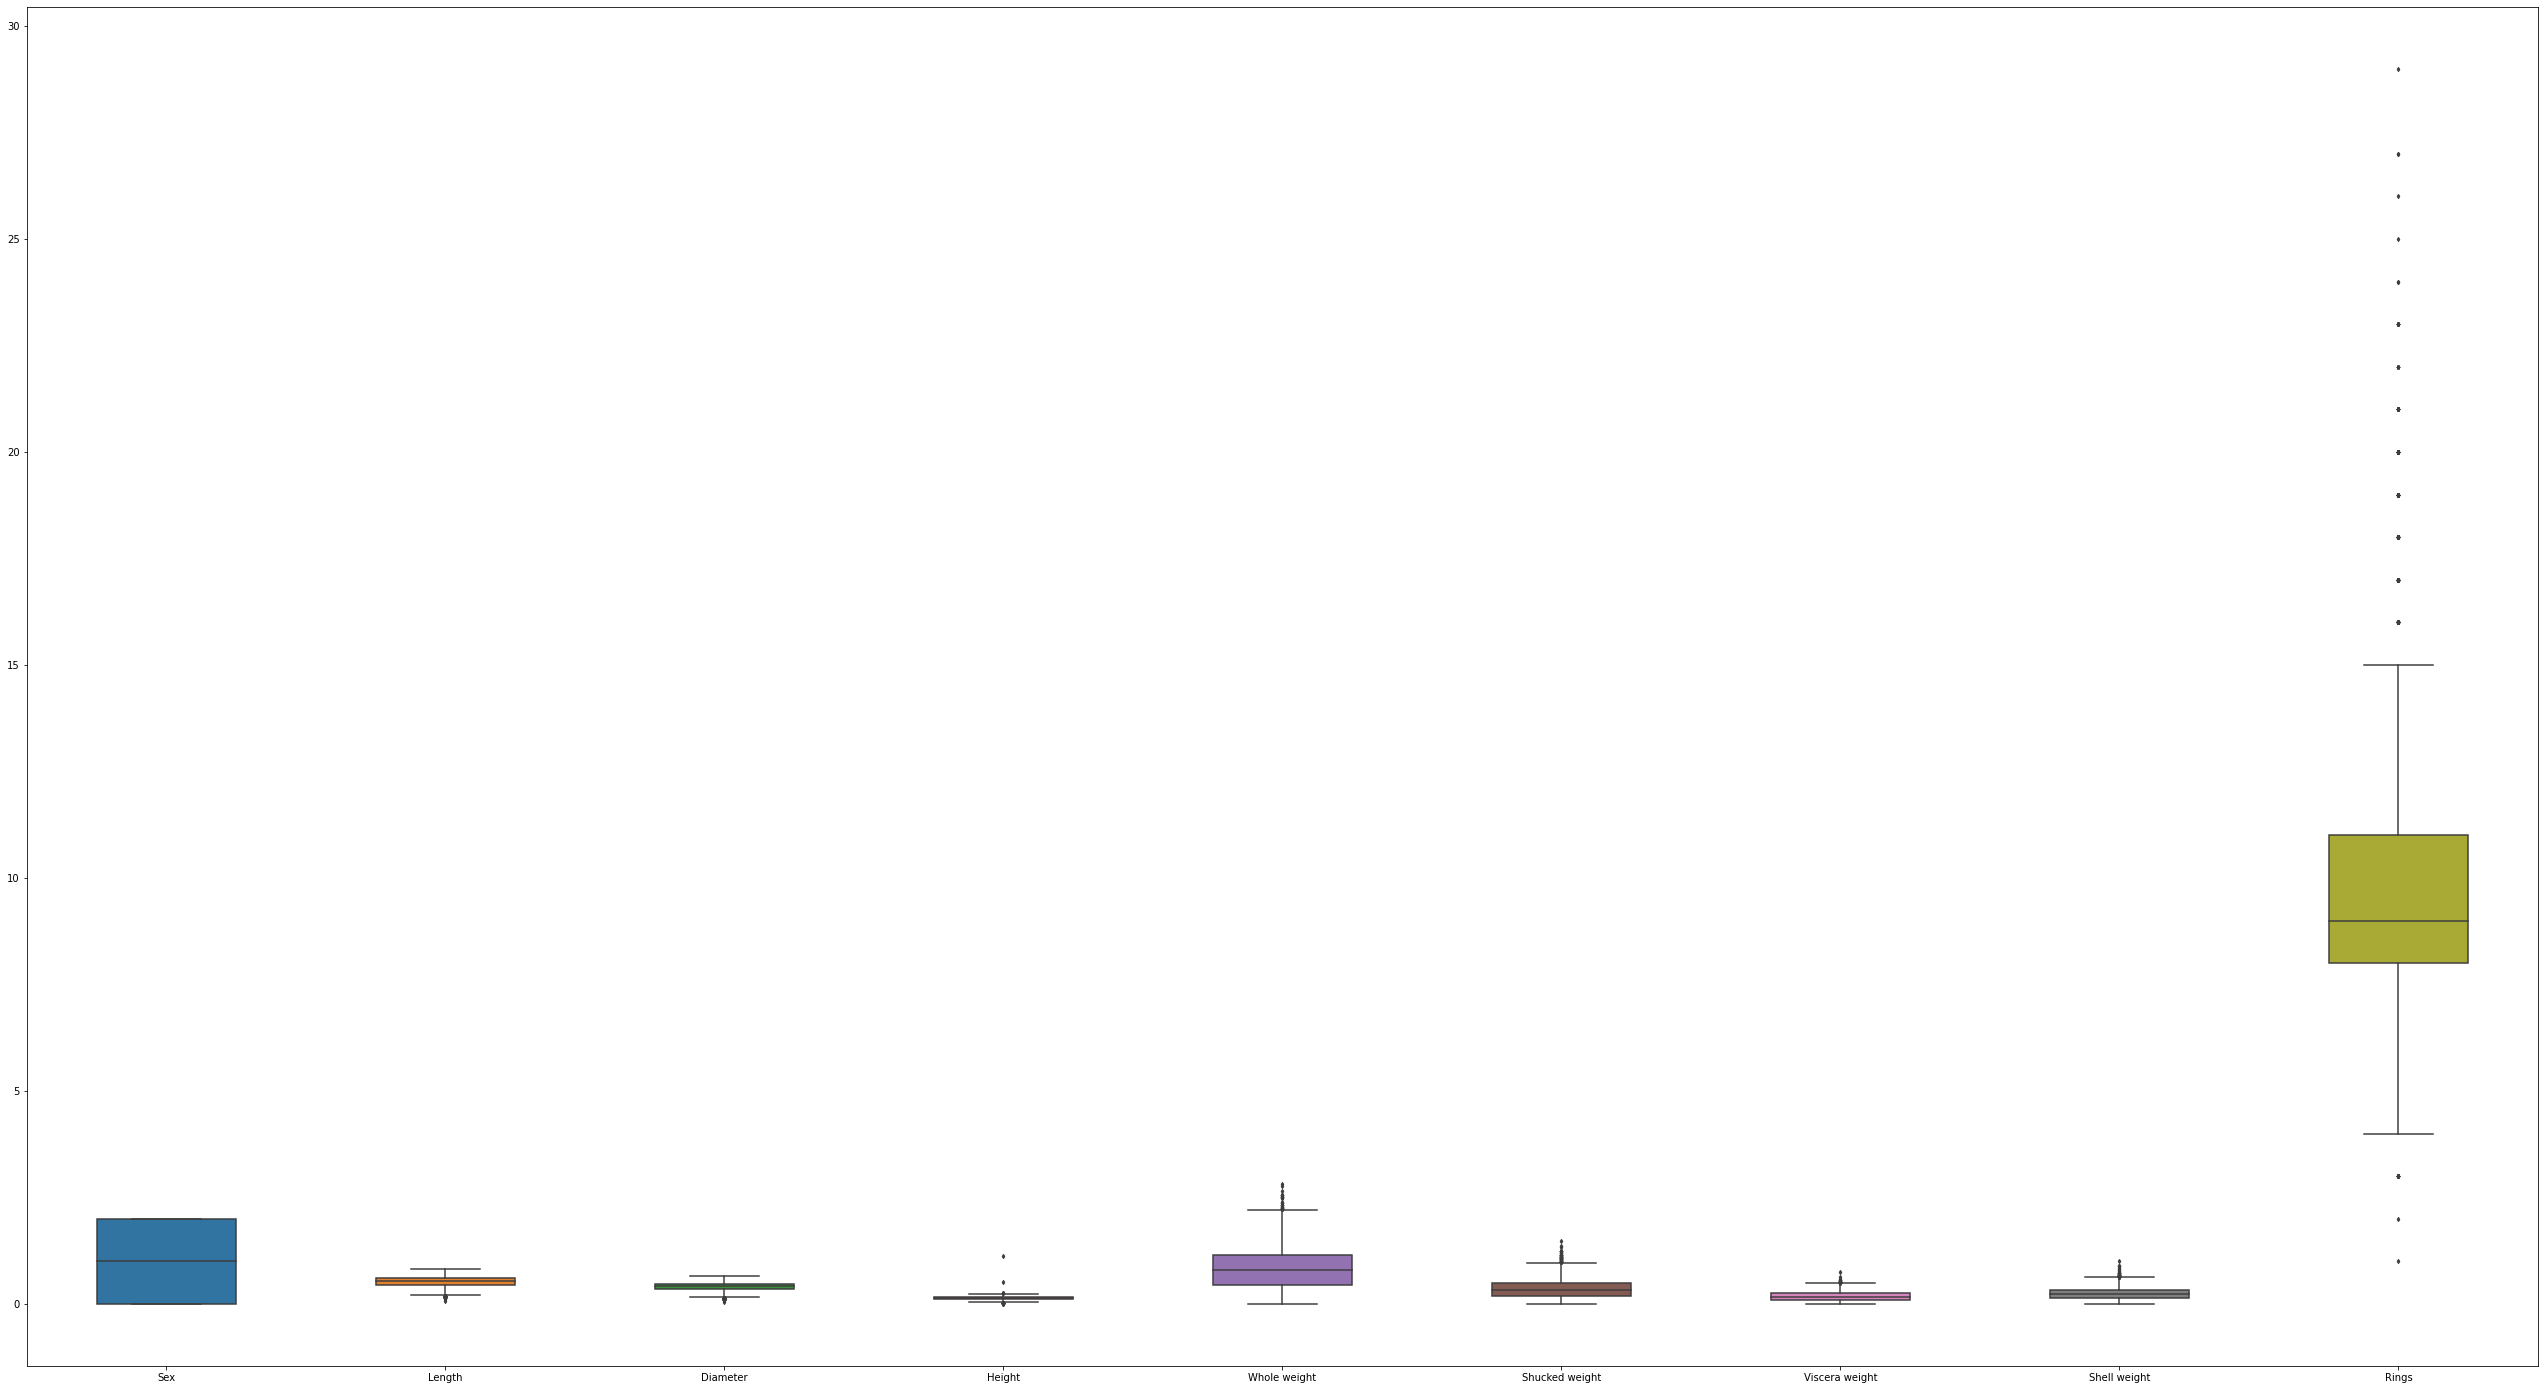

In [155]:
fig, ax =plt.subplots(figsize=(45,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- Target Variable has high outlier below low & upper quartile.
- Height & Viscera weight has less outliers
- Whole weight & Shucked weight has more outliers then height & Viscera weight.

### Pairplot 

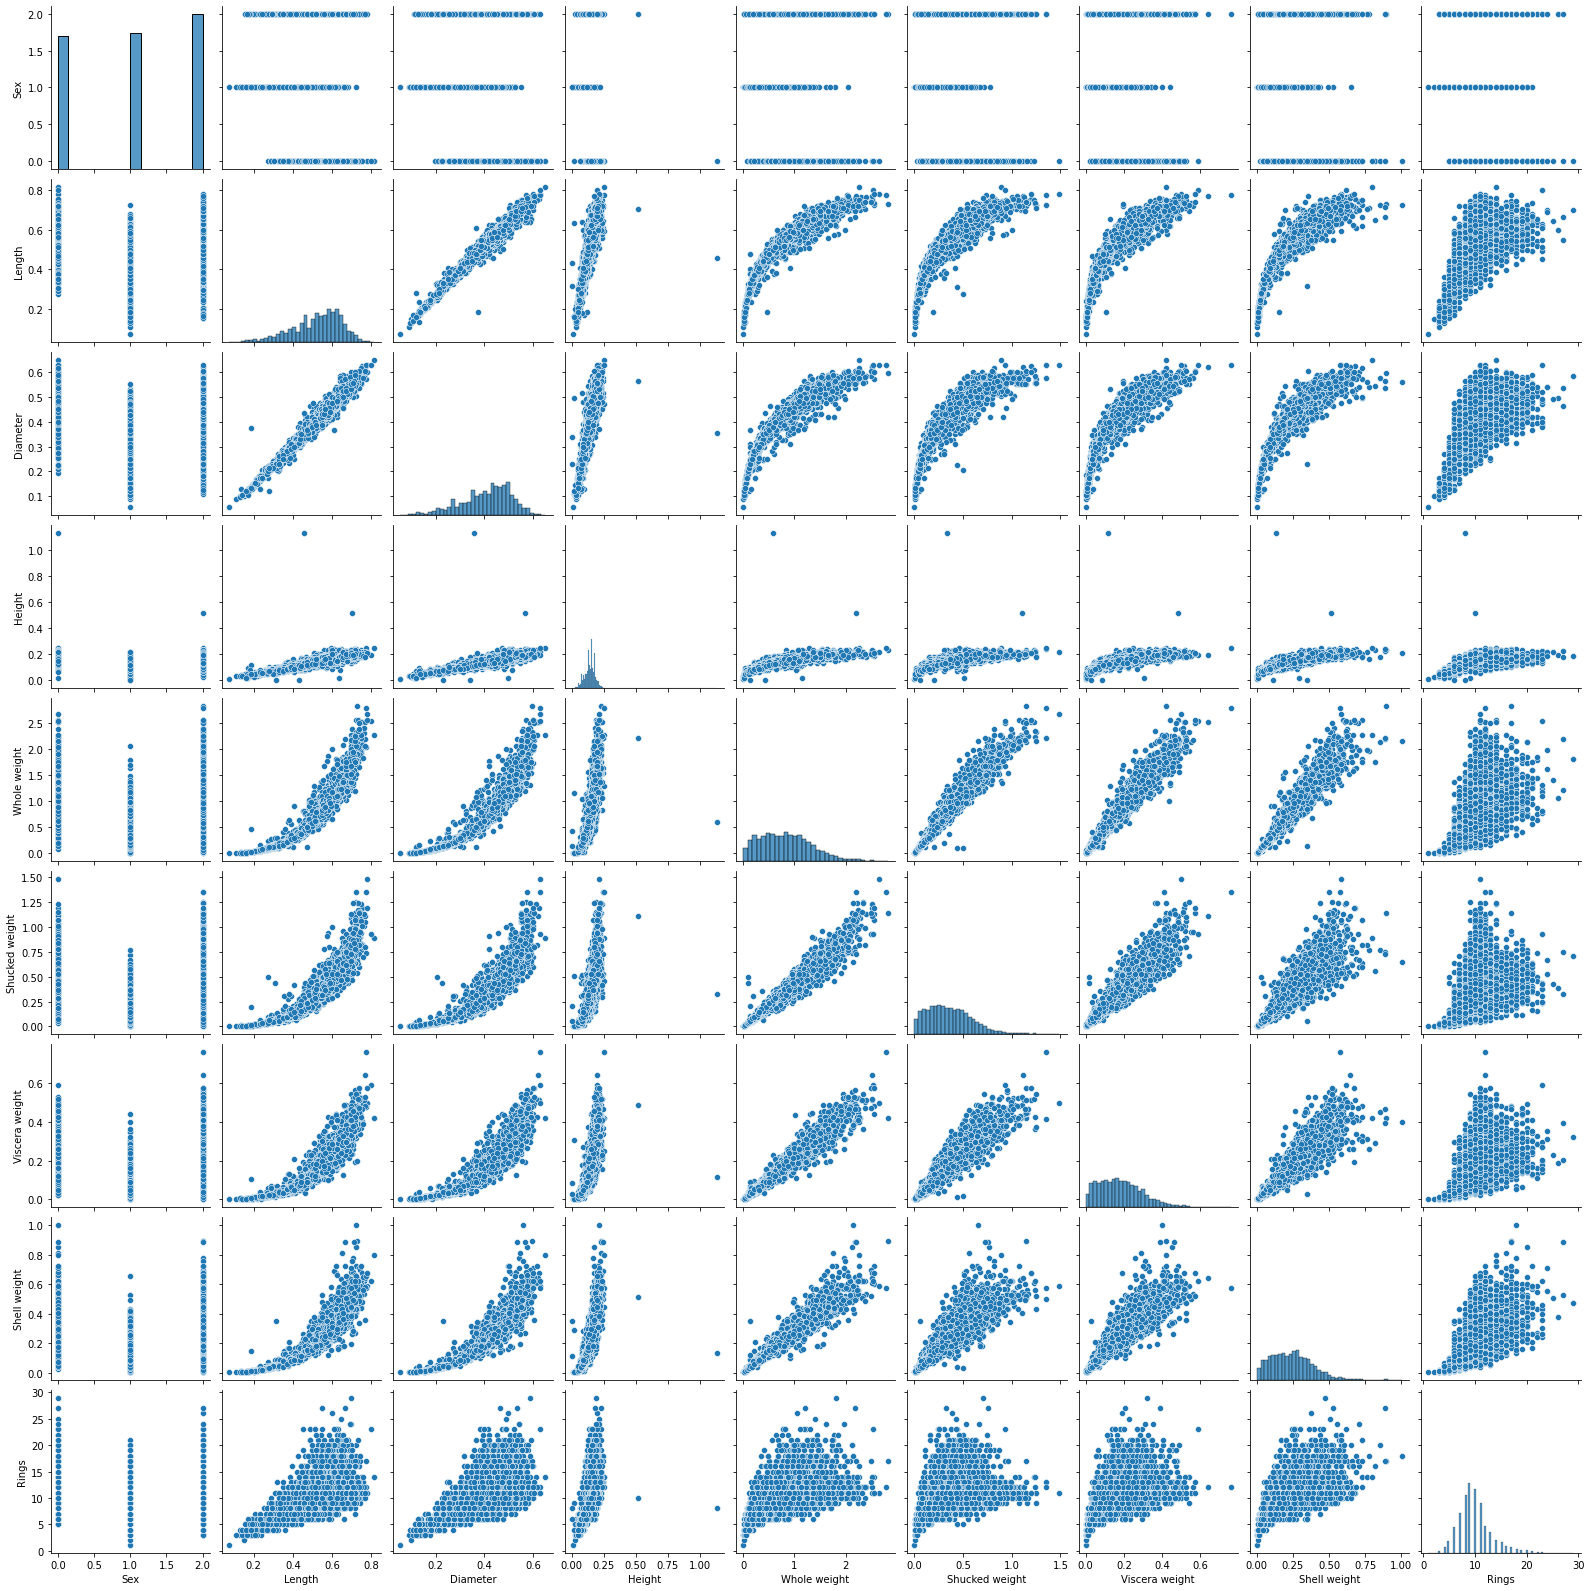

In [156]:
sns.pairplot(df)


- length & Diameter has Linear relationship  with Rings & Height. 
- Length & Diameter has polynomial Linear Relationship with shell, viscera & shucked weight.
- length has linear Relationship with diameter
- Height has linear relationship with most of the variables at lower value of height.
- Similar kind of observation is seen for other variables.

### Correlation

In [157]:
dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


- Gender variable is categorical type 
- length is highly correlated with diameter, height,whole weight, shucked wt, viscera wt, shell wt
- diameter is also highly correlated with almost all variables.
- Similar relationship of other variable is also seen.
- Ring(Target Variable) shows positive correlation with almost all variables.

### Heatmap

<AxesSubplot:>

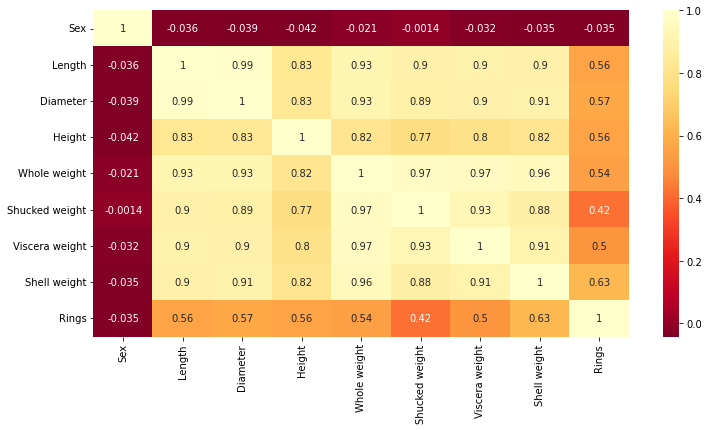

In [158]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Gender variable is categorical type 
- length is highly correlated with diameter, height,whole weight, shucked wt, viscera wt, shell wt
- diameter is also highly correlated with almost all variables.
- Similar relationship of other variable is also seen.
- Ring(Target Variable) shows positive correlation with almost all variables.

# Multicollinearity Check : Variation Inflation Factor

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Importing VIF Library

In [160]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- VIF is applied to all variables of dataframe

In [161]:
vif_calc()

   VIF Factor        features
0    2.563825             Sex
1  702.347884          Length
2  755.416018        Diameter
3   43.004758          Height
4  436.141083    Whole weight
5  117.686245  Shucked weight
6   64.740171  Viscera weight
7   82.562895    Shell weight
8   21.652131           Rings


- length & Diameter has multicollinearity realtionship.
- Whole weight & Shucked weight also has multicollinearity relationship

In [162]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

- To remove multicollinearity length & Shucked weight are dropped from the diameter.

In [163]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


- Verifying dropped variable

In [164]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- VIF is once again applied to check if multicollinearity still exists

In [165]:
vif_calc()

   VIF Factor        features
0    2.537687             Sex
1   58.307130        Diameter
2   42.683678          Height
3  131.971592    Whole weight
4   59.346850  Viscera weight
5   57.219277    Shell weight
6   18.686253           Rings


- There is no High value of VIF seen except whole weight
- Multicollinearity to some extent is removed by dropping length & Shucked weight column

# Removing Skewness

In [167]:
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

- Within the range of -0.5 to +0.5 skewness is not seen.
- Diameter: left skewed
- Height :  right skewed
- Whole weight :  slight right skewed
- Viscera weight : slight right skewed
- Shell weight   : right skewed
- Rings      : highly Right skewed   

In [168]:
import numpy as np
df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

- Sqrt Method applied to reduce the skewness of height variable
- Other variable skeweness is further removed by power tranform later

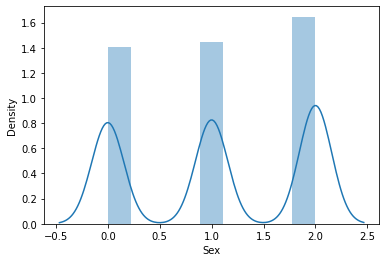

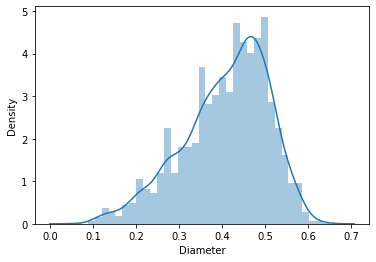

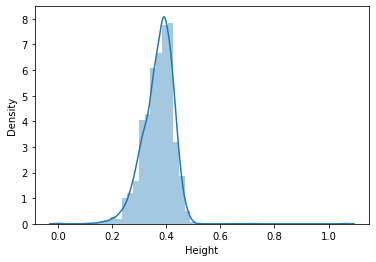

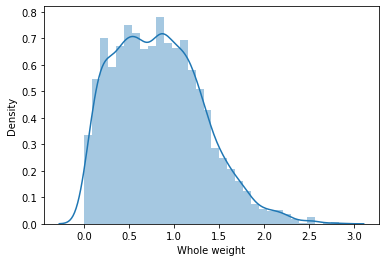

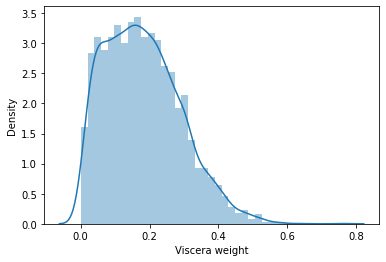

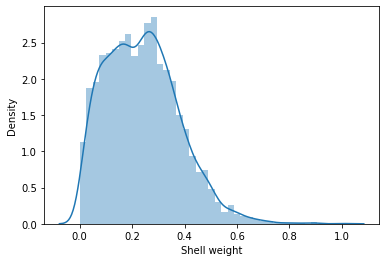

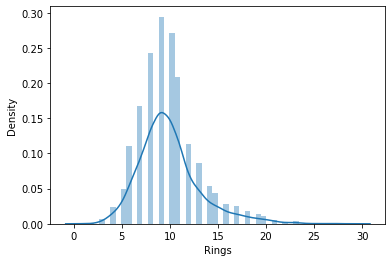

In [169]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- Height Column Skewness is reduced

# Removing Outliers with Z- Score

In [170]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  237,  238,  238,
        239,  270,  275,  277,  278,  294,  306,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  530,  572,  628,  673,  674,  675,
        678,  694,  694,  696,  718,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891, 1048, 1051, 1052, 1174, 1204, 1206, 1207,
       1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429,
       1757, 1759, 1762, 1762, 1763, 1763, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180, 2199,
       2201, 2208, 2209, 2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344,
       2358, 2368, 2381, 2436, 2459, 2471, 2623, 2624, 2624, 2709, 2710,
       2711, 2810, 2811, 2811, 2863, 2863, 3008, 3140, 3148, 3149, 3149,
       3151, 3151, 3188, 3190, 3193, 3280, 3359, 3

- Display the outlier value > 3 std value.

In [171]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (4039, 7)


- Outlier are removed as we can the number of rows got reduced

In [172]:
Data_loss=((4177-4039)/4177)*100 # Computing outlier percentage

In [173]:
Data_loss

3.303806559731865

- Outlier are less then 8% percent hence removed

### Separting Dataset y - as Target Variable (rings) & x as Independent variables

In [174]:
x=df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


- x dataset shows all independent variables

In [175]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4039, dtype: int64

- y dataset has only target variable rings

### Power Transform method applied to remove remaininig positive & negative skeweness.

In [176]:
from sklearn.preprocessing import power_transform # Importing power tranform
df=power_transform(df,method='yeo-johnson') # Applying power transform to whole dataframe

In [177]:
x.skew()

Sex              -0.098440
Diameter         -0.577025
Height           -0.570687
Whole weight      0.391683
Viscera weight    0.459107
Shell weight      0.369555
dtype: float64

- Skewness is reduced to great extent for Diameter, Height & for other variable falling with in the range

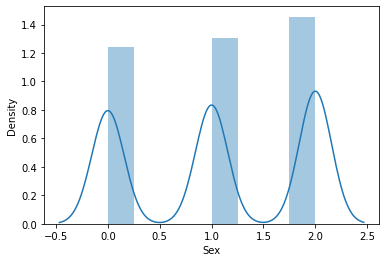

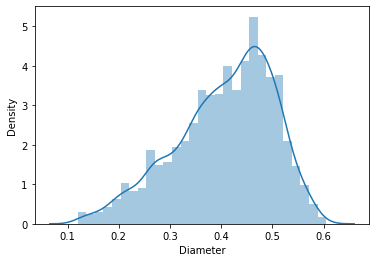

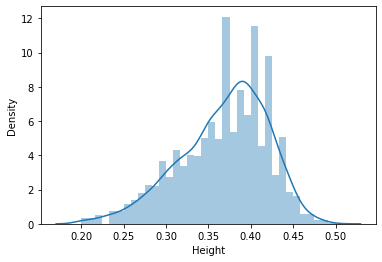

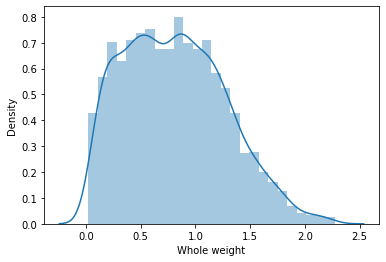

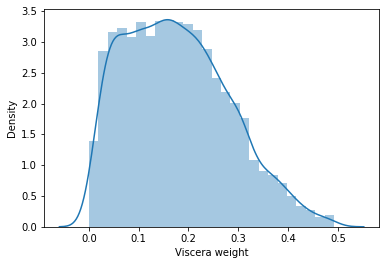

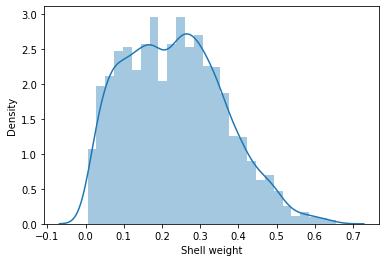

In [178]:
for i in x:
    plt.figure()
    sns.distplot(x[i])

- Skewness is reduced to great extent for Diameter, Height & for other variable falling with in the range

# Scaling the Independent Variables 

In [179]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[ 1.15550471, -0.43256586, -1.16547822, -0.63881187, -0.728955  ,
        -0.63817671],
       [ 1.15550471, -1.47650319, -1.32432711, -1.26106184, -1.23160309,
        -1.25790001],
       [-1.28543856,  0.14159967, -0.02150106, -0.28724602, -0.3411979 ,
        -0.17338424],
       ...,
       [ 1.15550471,  0.7157652 ,  1.62763892,  0.78901996,  1.05664251,
         0.5857768 ],
       [-1.28543856,  0.82015893,  0.36254185,  0.61323704,  0.8029249 ,
         0.4928183 ],
       [ 1.15550471,  1.55091506,  1.41158391,  2.45518323,  1.90875071,
         2.03438   ]])

- Standard Scaler is applied to independent variables (x dataset) to have similar range of values.

# Decision Tree is Configured for 200 Random State

In [180]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

1.9827456864216053 at random_state 0
2.0127531882970744 at random_state 1
2.024006001500375 at random_state 2
2.1462865716429107 at random_state 3
2.04351087771943 at random_state 4
1.9932483120780196 at random_state 5
2.096774193548387 at random_state 6
2.1117779444861213 at random_state 7
2.0547636909227305 at random_state 8
2.021755438859715 at random_state 9
1.9197299324831207 at random_state 10
2.0165041260315077 at random_state 11
1.978244561140285 at random_state 12
2.067516879219805 at random_state 13
2.0315078769692425 at random_state 14
2.013503375843961 at random_state 15
2.0315078769692425 at random_state 16
2.1057764441110276 at random_state 17
2.0277569392348087 at random_state 18
2.126781695423856 at random_state 19
2.0337584396099024 at random_state 20
2.0885221305326334 at random_state 21
2.1095273818454614 at random_state 22
2.122280570142536 at random_state 23
2.061515378844711 at random_state 24
2.1200300075018754 at random_state 25
2.061515378844711 at random_state

- Output Shows 200 random state along with MAE of each random state.

### Decision Tree Regressor is Set to provide best Random State with leact MAE

In [181]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  2.192244224422442  on Random_state  94


- Best Random State is 94 with MAE = 2.19

# Splitting Training Set & Test Set.

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 94)

- 70% Data is used for training set (x_train, y_train)
- 30% Data is used for test set (x_test,y_test)
- Best Random state selected as 94 as per above 

# Linear Regression

In [183]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  1.5614650252015934


0.4551420196903284

- Linear Regression Model Score is 45% with MAE = 1.56

# Decision Tree Regression

In [184]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  2.1765676567656764


1.0

- DTR Model Scored 100% with MAE = 2.17

# Random Forest Regression

In [185]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  1.5491584158415843


0.9278330329707171

- RFR Model Score is 92% with MAE = 1.54

# Support Vector Regression

In [186]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  1.4276880214298673


0.4891545515589658

- SVR Model Score is 48% with MAE = 1.42 

# XGBoost Regression

In [187]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  1.6338130768769645


0.9310730068873682

- XGBR Model Score is  93% with MAE = 1.63

# K-fold Cross Validation

In [188]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [189]:
cross_validation=KFold(5, shuffle =True) 
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [190]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.45292288003898484


In [191]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

0.01098188976608958


In [192]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.47835579911396947


In [193]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

0.47968859869804775


In [194]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

0.43622756362856024


# Best Model Selection

- Diff(MAE-CV)-lm  =  1.5614650252015934 - 0.45292288003898484 = 1.11
- Diff(MAE-CV)-DTR =  2.1765676567656764 - 0.01098188976608958 = 2.16
- Diff(MAE-CV)-RFR  =  1.5491584158415843 - 0.47835579911396947 = 1.07 
- Diff(MAE-CV)-SV   =  1.4276880214298673 - 0.47968859869804775 = 0.95
- Diff(MAE-CV)-XGBR =  1.6338130768769645 - 0.43622756362856024 = 1.2

- SVR Has Least Value = 0.95, so the best model is SVR & applying Hyperparameter on it.

# Hyperparameter & GridsearchCV

In [195]:
from sklearn.model_selection import GridSearchCV # Obs : importing GridSearchCV

# Setting SVR Gridsearch Parameter

In [202]:
import numpy as np
parameters = {'kernel':['linear','rbf'], 'C':[1,2,4,6,8,10], 'gamma': [0.1,0.01, 0.001, 0.0001]}

- SVR Gridserach Parameter is Configured with above parameters

# Creating Gridserach CV Instance

In [203]:
GCV=GridSearchCV(SVR(),parameters,cv=cross_validation)
# Obs : Creating Grid Search CV Object and Applying GridSearch on best Model - XGBR

In [204]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [1, 2, 4, 6, 8, 10],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

- SVR GridSerach Parameter applied to the training set.

In [205]:
GCV.best_params_ # Giving the Best Gridserach Parameters

{'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}

- These are the best Parameter for SVR we got through GridsearchCV ({'C': 8, 'gamma': 0.1, 'kernel': 'rbf'})

# Best Parameter for SVR Applied 

In [207]:
Final_mod = SVR(C = 8, gamma = 0.1, kernel = 'rbf')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

Mean Absolute error:  1.4142103905385484


- Final SVR Model with Best Hyperparameter showing MAE = 1.141 which is least among all above

# Exporting Model with Joblib Library

In [208]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

- Exporting ML model as .pkl file through joblib library